# Setup

In [1]:
# Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# TensorFlow ≥2.0
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
from pathlib import Path

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
'''
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
'''

'\ndef save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):\n    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)\n    print("Saving figure", fig_id)\n    if tight_layout:\n        plt.tight_layout()\n    plt.savefig(path, format=fig_extension, dpi=resolution)\n'

In [2]:
tf.test.is_gpu_available()

False

## Generate the Dataset


In [4]:
def generate_multivariate_time_series(batch_size, n_steps, n_variables):
    return np.random.rand(batch_size, n_steps, n_variables)

n_variables = 2
n_steps = 50
batch_size = 10000
series = generate_multivariate_time_series(batch_size, n_steps+1, n_variables)

X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

print(series.shape)
X_train.shape, y_train.shape

(10000, 51, 2)


((7000, 50, 2), (7000, 2))

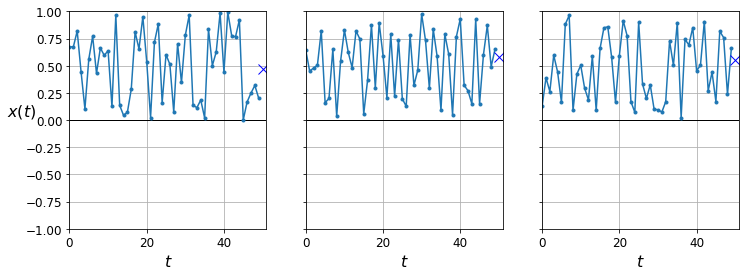

In [5]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
#save_fig("time_series_plot")
plt.show()

## Deep RNN

In [56]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, n_variables]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(n_variables)
])

In [57]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.1249 - val_loss: 0.0895
Epoch 2/20
7000/7000 [==============================] - 7s 945us/sample - loss: 0.0883 - val_loss: 0.0869
Epoch 3/20
7000/7000 [==============================] - 6s 897us/sample - loss: 0.0866 - val_loss: 0.0853
Epoch 4/20
7000/7000 [==============================] - 6s 918us/sample - loss: 0.0864 - val_loss: 0.0854
Epoch 5/20
7000/7000 [==============================] - 6s 866us/sample - loss: 0.0864 - val_loss: 0.0925
Epoch 6/20
7000/7000 [==============================] - 6s 861us/sample - loss: 0.0858 - val_loss: 0.0897
Epoch 7/20
7000/7000 [==============================] - 6s 857us/sample - loss: 0.0859 - val_loss: 0.0854
Epoch 8/20
7000/7000 [==============================] - 6s 862us/sample - loss: 0.0850 - val_loss: 0.0863
Epoch 9/20
7000/7000 [==============================] - 6s 855us/sample - loss: 0.0855 - val_loss: 0.0855


## Deep RNN Dense Output

In [9]:
model_dense_output = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, n_variables]),
    keras.layers.SimpleRNN(20, return_sequences=False),
    keras.layers.Dense(n_variables)
])

model_dense_output.compile(loss="mse", optimizer="adam")
history = model_dense_output.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 913us/sample - loss: 0.1447 - val_loss: 0.0860
Epoch 2/20
7000/7000 [==============================] - 5s 691us/sample - loss: 0.0866 - val_loss: 0.0863
Epoch 3/20
7000/7000 [==============================] - 4s 627us/sample - loss: 0.0855 - val_loss: 0.0858
Epoch 4/20
7000/7000 [==============================] - 5s 646us/sample - loss: 0.0855 - val_loss: 0.0833
Epoch 5/20
7000/7000 [==============================] - 4s 623us/sample - loss: 0.0850 - val_loss: 0.0842
Epoch 6/20
7000/7000 [==============================] - 5s 646us/sample - loss: 0.0849 - val_loss: 0.0846
Epoch 7/20
7000/7000 [==============================] - 4s 621us/sample - loss: 0.0848 - val_loss: 0.0834
Epoch 8/20
7000/7000 [==============================] - 4s 619us/sample - loss: 0.0847 - val_loss: 0.0858
Epoch 9/20
7000/7000 [==============================] - 5s 735us/sample - loss: 0.0845 - val_loss: 0.083

## GRU

In [6]:
model_dense_output = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, n_variables]),
    keras.layers.GRU(20, return_sequences=False),
    keras.layers.Dense(n_variables)
])

model_dense_output.compile(loss="mse", optimizer="adam")
history = model_dense_output.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.1013 - val_loss: 0.0837
Epoch 2/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0845 - val_loss: 0.0833
Epoch 3/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0844 - val_loss: 0.0827
Epoch 4/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0842 - val_loss: 0.0831
Epoch 5/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0841 - val_loss: 0.0848
Epoch 6/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0841 - val_loss: 0.0830
Epoch 7/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0841 - val_loss: 0.0828
Epoch 8/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0838 - val_loss: 0.0830
Epoch 9/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0839 - val_loss: 0.0833
Epoch 10/20
700